In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [3]:


cols = [('A','pop'),('A','dead'),('B','pop'),('B','dead')]

# example populations of two countries

df2 = pd.DataFrame(data=[[100000,1000,900000,9000], #child: pop,dead,pop,dead : A,B
                         [900000,90000,100000,10000]],    #adult pop,dead : A,B
                   columns=pd.MultiIndex.from_tuples(cols),index=['child','adult'])

# define a standard population, by age groups
standard_pop = pd.DataFrame({'child' : [500000],
                            'adult' : [500000]}).T

standard_pop.columns=['pop']

df2

A              B       
          pop   dead     pop   dead
child  100000   1000  900000   9000
adult  900000  90000  100000  10000

In [4]:
df2.loc['All',:] = df2.sum() 
df2

A                   B         
             pop     dead        pop     dead
child   100000.0   1000.0   900000.0   9000.0
adult   900000.0  90000.0   100000.0  10000.0
All    1000000.0  91000.0  1000000.0  19000.0

In [5]:
df2[('A','ratio')] = df2[('A','dead')] / df2[('A','pop')]
df2[('B','ratio')] = df2[('B','dead')] / df2[('B','pop')]
df2

A                   B               A      B
             pop     dead        pop     dead  ratio  ratio
child   100000.0   1000.0   900000.0   9000.0  0.010  0.010
adult   900000.0  90000.0   100000.0  10000.0  0.100  0.100
All    1000000.0  91000.0  1000000.0  19000.0  0.091  0.019

In [6]:
df2 = df2.reindex(columns=[('A','pop'),('A','dead'),('A','ratio'),('B','pop'),('B','dead'),('B','ratio')])

In [7]:
df2

A                          B                
             pop     dead  ratio        pop     dead  ratio
child   100000.0   1000.0  0.010   900000.0   9000.0  0.010
adult   900000.0  90000.0  0.100   100000.0  10000.0  0.100
All    1000000.0  91000.0  0.091  1000000.0  19000.0  0.019

In [8]:
standard_pop

,pop
child,500000
adult,500000


In [9]:
standard_pop['expected_A'] = df2[('A','ratio')] * standard_pop['pop']
standard_pop['expected_B'] = df2[('B','ratio')] * standard_pop['pop']
standard_pop.loc['All',:] = standard_pop.sum()
standard_pop['rate_A'] = standard_pop['expected_A'] / standard_pop['pop']
standard_pop['rate_B'] = standard_pop['expected_B'] / standard_pop['pop']

standard_pop

,pop,expected_A,expected_B,rate_A,rate_B
child,500000.0,5000.0,5000.0,0.010,0.010
adult,500000.0,50000.0,50000.0,0.100,0.100
All,1000000.0,55000.0,55000.0,0.055,0.055


In [10]:
##### example on Simpson's Paradox from link below: 

# https://www.healthknowledge.org.uk/e-learning/epidemiology/specialists/standardisation
# fake data from the above link'


df = pd.DataFrame({'age_grp': ['inf','inf','child','child','adult','adult','old','old'],
                  'country' : ['A','B','A','B','A','B','A','B'],
                  'pop' : [1000000,1000000,6000000,1500000,5500000,550000,2500000,120000],
                  'dead' : [1000,1000,7000,6300,20000,3000,120000,6000]})


df['age_grp'] = pd.Categorical(df['age_grp'],['inf','child','adult','old'])

df

,age_grp,country,pop,dead
0,inf,A,1000000,1000
1,inf,B,1000000,1000
2,child,A,6000000,7000
3,child,B,1500000,6300
4,adult,A,5500000,20000
5,adult,B,550000,3000
6,old,A,2500000,120000
7,old,B,120000,6000


In [11]:
pivot = pd.pivot_table(df,index='age_grp',columns='country',values=['pop','dead'],aggfunc=sum,margins=True)
pivot

dead                      pop                   
country       A      B     All         A        B       All
age_grp                                                    
inf        1000   1000    2000   1000000  1000000   2000000
child      7000   6300   13300   6000000  1500000   7500000
adult     20000   3000   23000   5500000   550000   6050000
old      120000   6000  126000   2500000   120000   2620000
All      148000  16300  164300  15000000  3170000  18170000

In [12]:
pivot['age_ratio_A'] = pivot[('pop','A')] / pivot.loc['All',('pop','A')]
pivot['age_ratio_B'] = pivot[('pop','B')] / pivot.loc['All',('pop','B')]

pivot['dead_ratio_A'] = pivot[('dead','A')] / pivot[('pop','A')]
pivot['dead_ratio_B'] = pivot[('dead','B')] / pivot[('pop','B')]

pivot['delta_dead_ratio'] = pivot['dead_ratio_B'] - pivot['dead_ratio_A']
pivot['factor'] = pivot['dead_ratio_B'] / pivot['dead_ratio_A']

pivot

dead                      pop                    age_ratio_A  \
country       A      B     All         A        B       All               
age_grp                                                                   
inf        1000   1000    2000   1000000  1000000   2000000    0.066667   
child      7000   6300   13300   6000000  1500000   7500000    0.400000   
adult     20000   3000   23000   5500000   550000   6050000    0.366667   
old      120000   6000  126000   2500000   120000   2620000    0.166667   
All      148000  16300  164300  15000000  3170000  18170000    1.000000   

        age_ratio_B dead_ratio_A dead_ratio_B delta_dead_ratio    factor  
country                                                                   
age_grp                                                                   
inf        0.315457     0.001000     0.001000         0.000000  1.000000  
child      0.473186     0.001167     0.004200         0.003033  3.600000  
adult      0.173502     0.003636     0.005455         0.001818  1.500000  
old        0.037855     0.048000     0.050000         0.002000  1.041667  
All        1.000000     0.009867     0.005142        -0.004725  0.521144

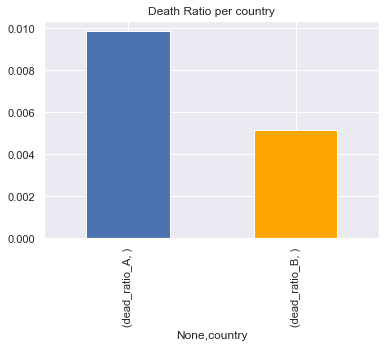

In [13]:
# for the fake data, the observation here is that Simpson's Paradox strikes again - overall country A has higher death ratio,
# despite the fact that it has lower death ratios in each age group. 

pivot.loc['All','dead_ratio_A' : 'dead_ratio_B'].plot(kind='bar',color=['b','orange'],title='Death Ratio per country')

Text(0, 0.5, 'percentage')

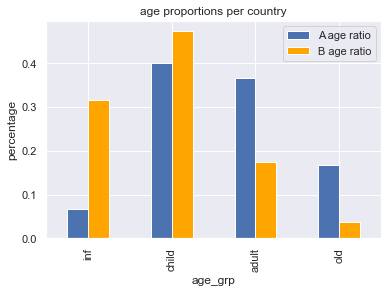

In [14]:
pivot.loc[:'old','age_ratio_A':'age_ratio_B'].plot(kind='bar',
                                                   color=['b','orange'],title='age proportions per country')
plt.legend(['A age ratio','B age ratio'])
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

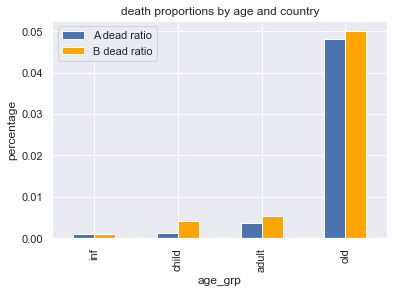

In [15]:
pivot.loc[:'old','dead_ratio_A': 'dead_ratio_B'].plot(kind='bar',
                                                     color=['b','orange'],title='death proportions by age and country')
plt.legend(['A dead ratio','B dead ratio'])
plt.ylabel('percentage')

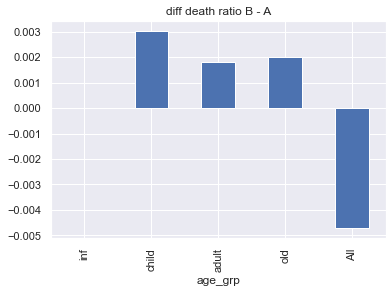

In [16]:
pivot['delta_dead_ratio'].plot(kind='bar',title='diff death ratio B - A')

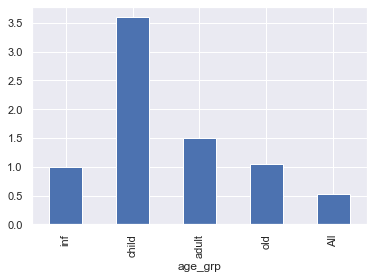

In [17]:
pivot['factor'].plot(kind='bar')